In [1]:
from society.agent import Agent
from society.simulation import Simulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.selection.greedy import GreedySelectionStrategy, EGreedySelectionStrategy
from society.strategies.selection.random import RandomSelectionStrategy

import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
def make_graph(returns):
    G = nx.MultiDiGraph()
    G.add_weighted_edges_from([
        (agent, partner, sum(ret))
        for agent, agent_returns in returns.items()
        for partner, ret in agent_returns.items()
        if len(ret) > 0
    ])
    return G

def plot_returns(G):
    plt.figure()    
    pos = nx.circular_layout(G)
    weight_labels = nx.get_edge_attributes(G, 'weight')

    edges = G.edges.data()

    colors = []
    weights = []
    for (u, v, attrib_dict) in list(G.edges.data()):
        weights.append(attrib_dict['weight'])
        if u <= v:
            colors.append("blue")
        else:
            colors.append("green")

    max_weight = max(weights)
    weights = [weight / max_weight * 20 for weight in weights]

    nx.draw(G, pos, font_color="white", node_shape="s", with_labels=True, width=weights, edge_color=colors, connectionstyle="arc3, rad = 0.2", arrowstyle="Simple")

def print_returns(returns):
    for agent in returns:
        print(f"{str(agent) + ':':<20}{sum(returns[agent].values())}")


C:\Users\jerem\AppData\Local\Temp\ipykernel_20996\277431280.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


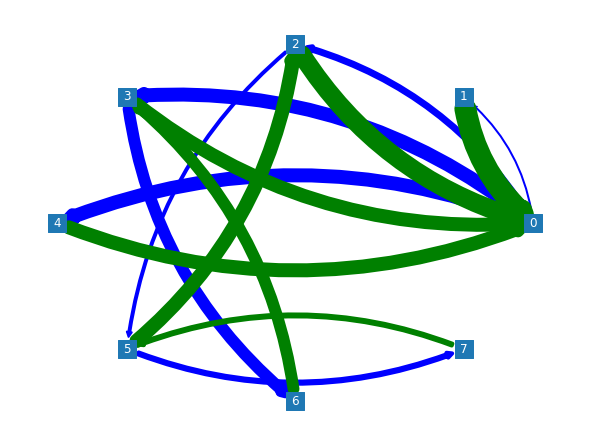

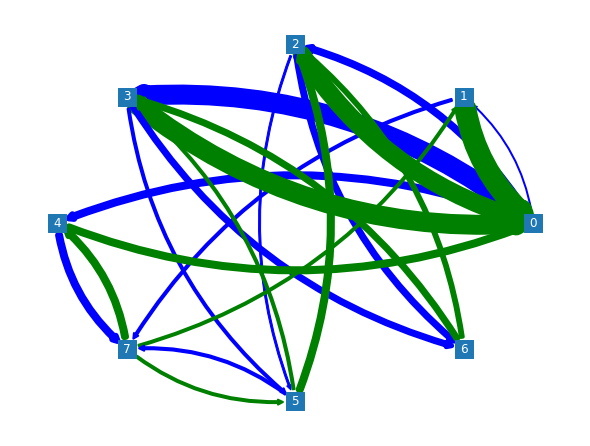

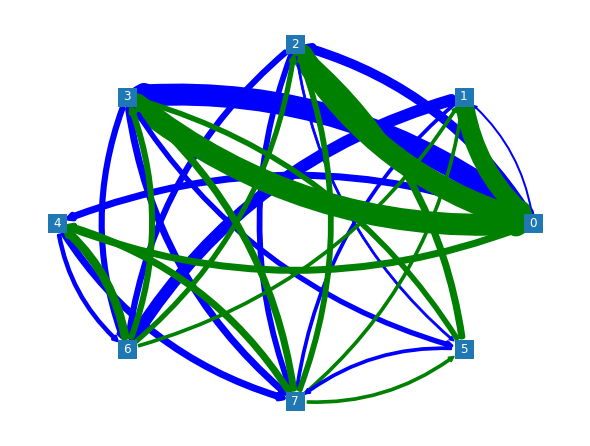

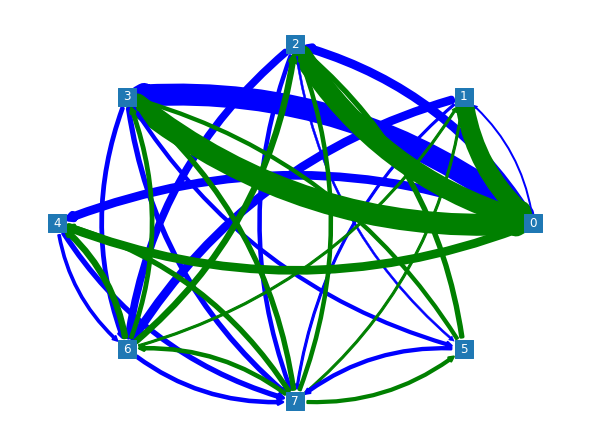

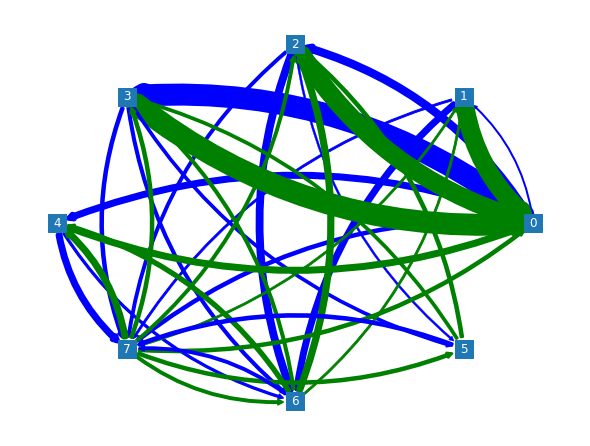

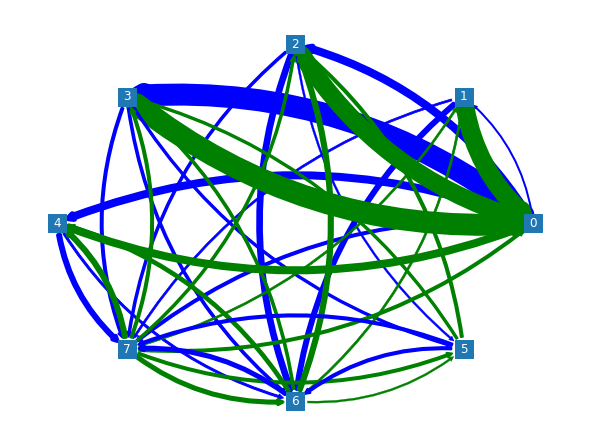

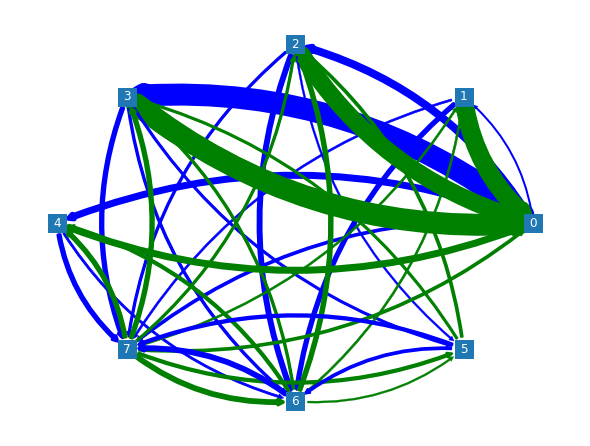

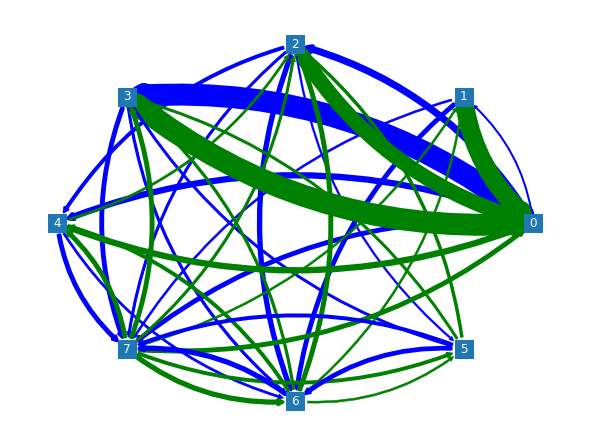

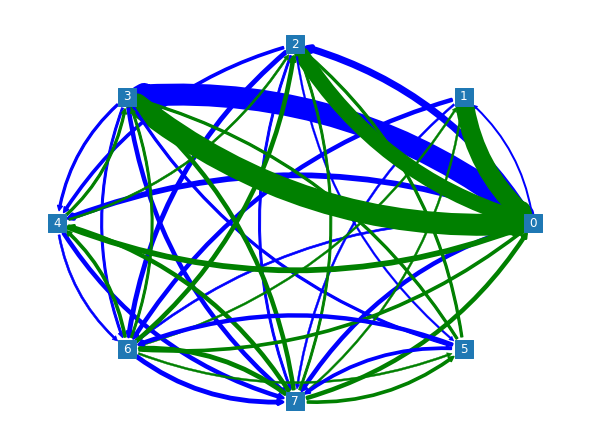

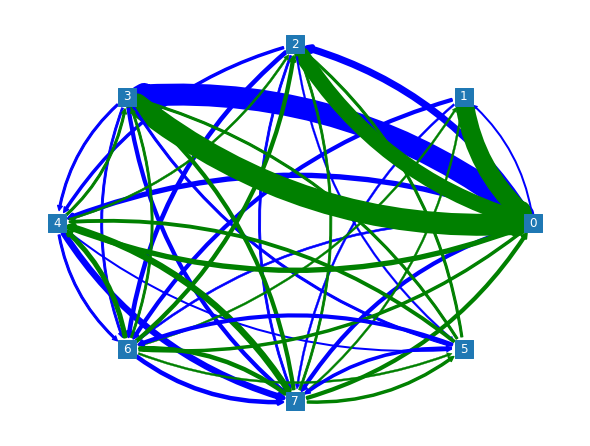

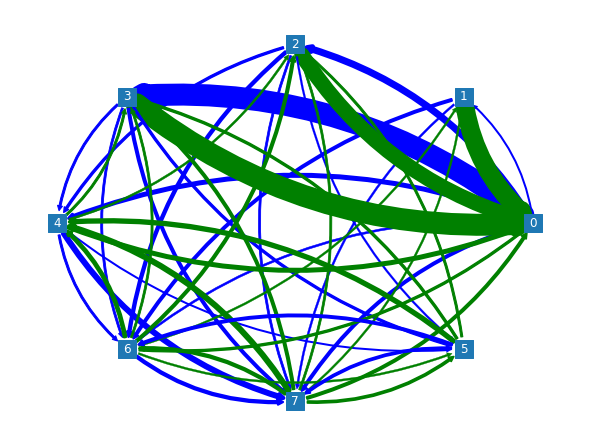

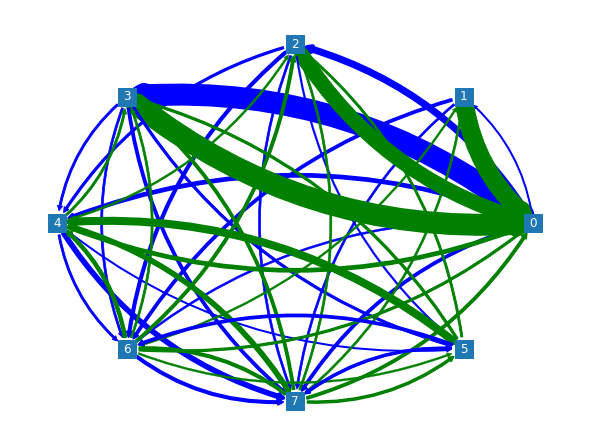

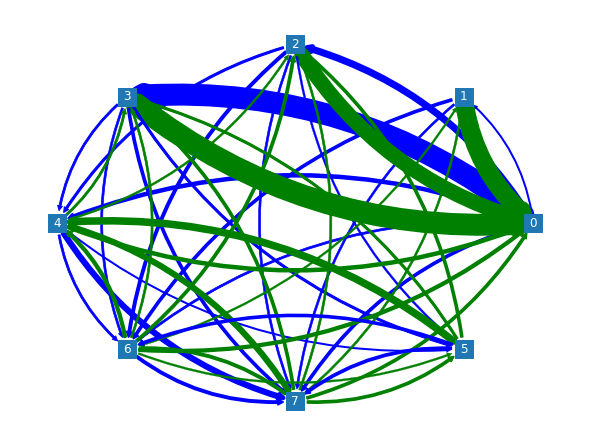

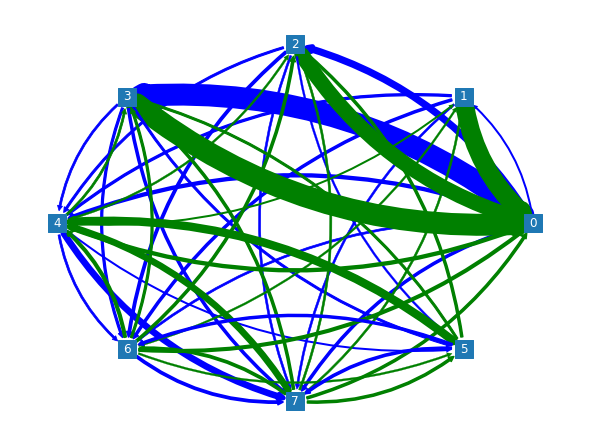

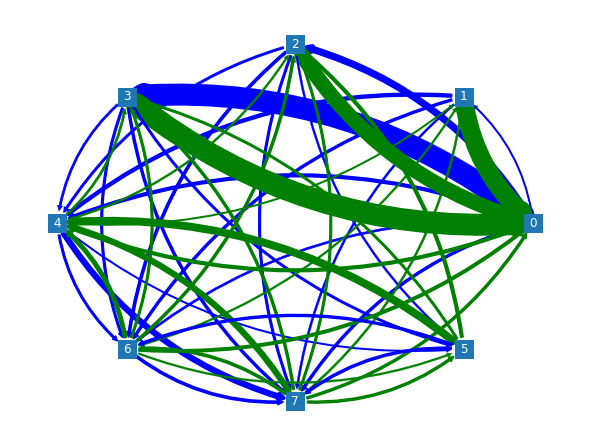

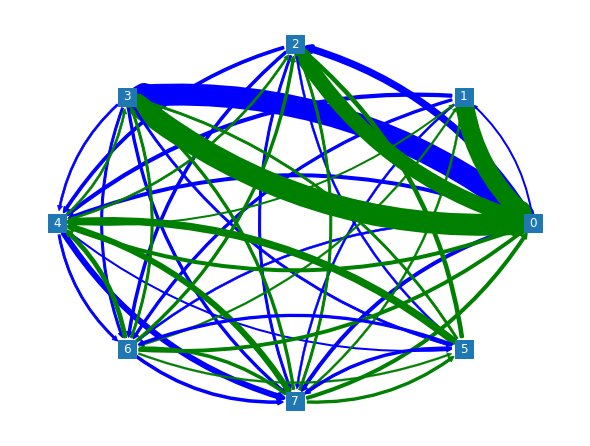

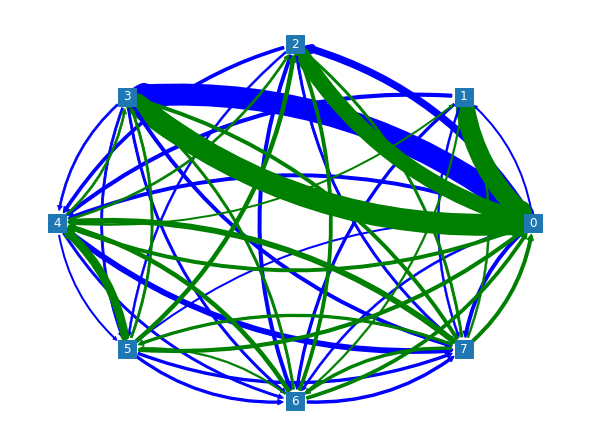

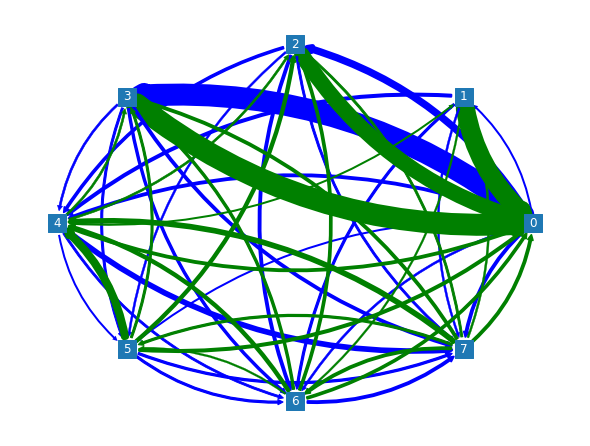

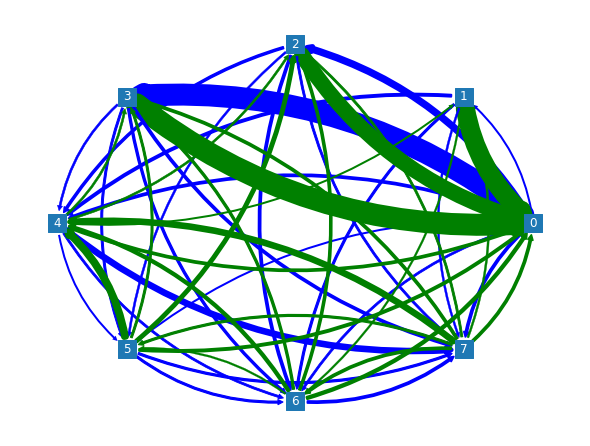

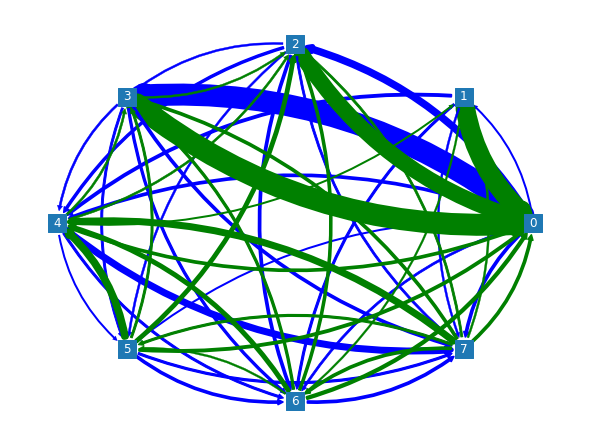

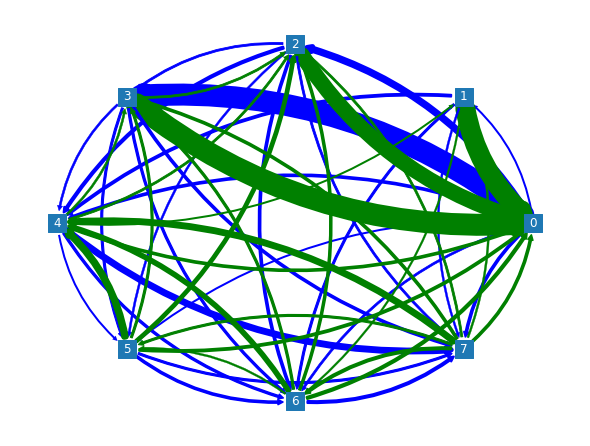

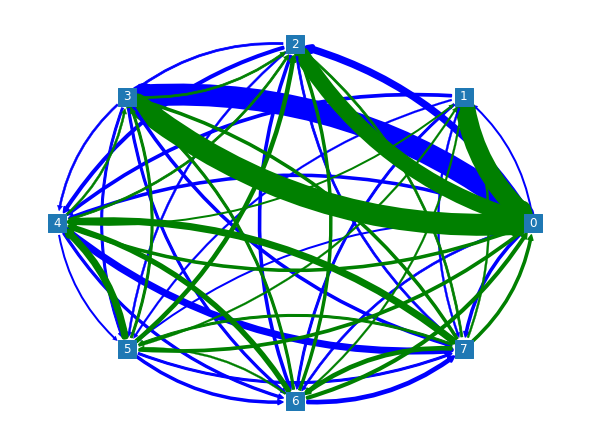

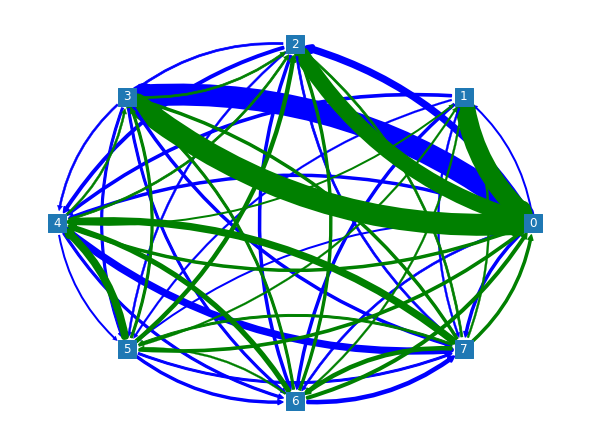

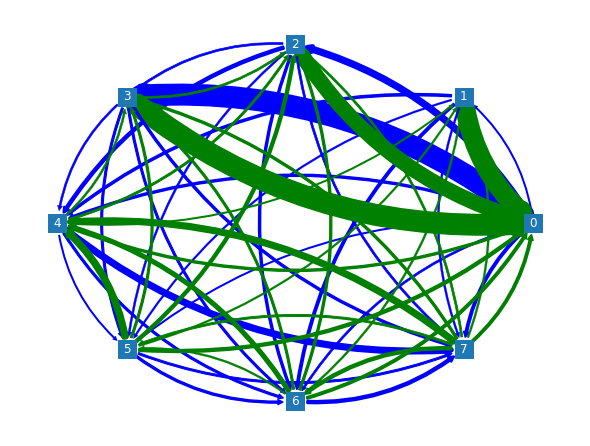

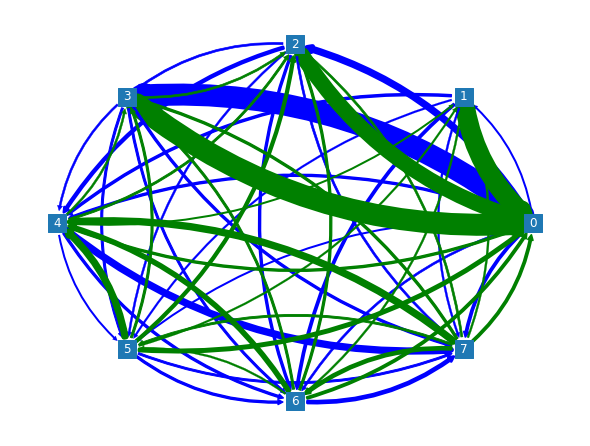

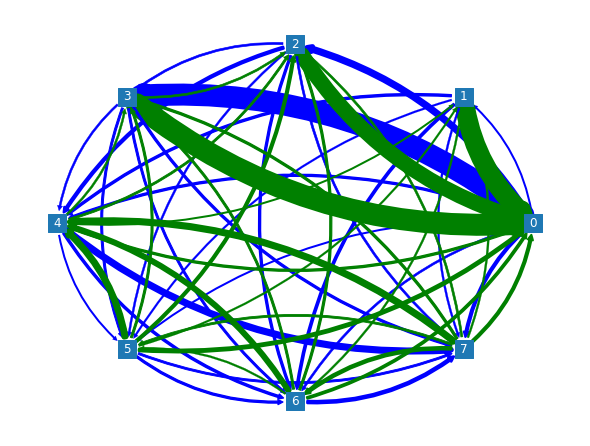

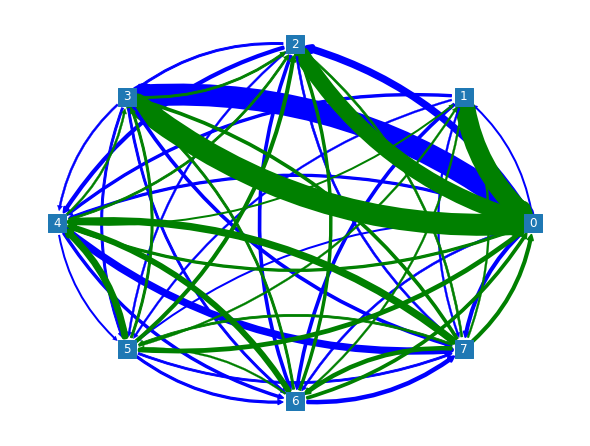

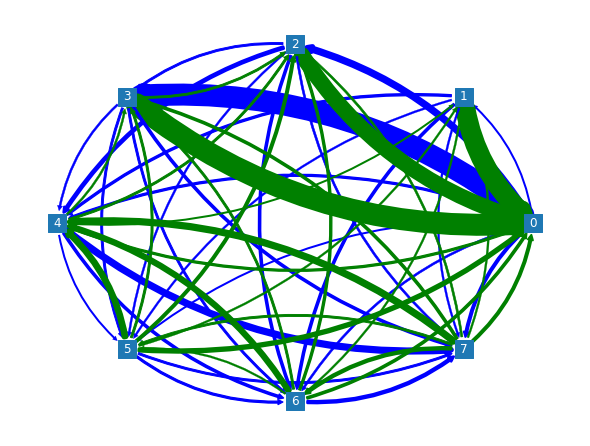

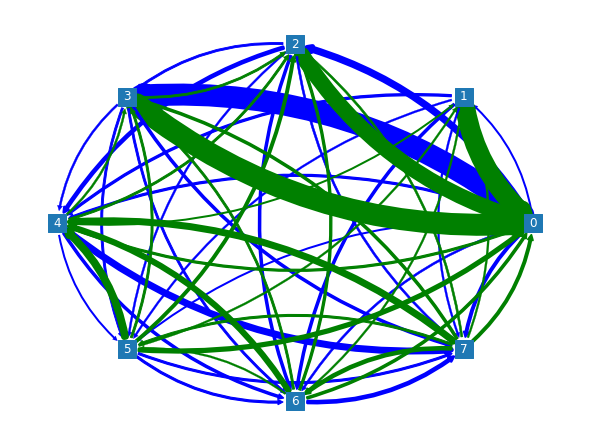

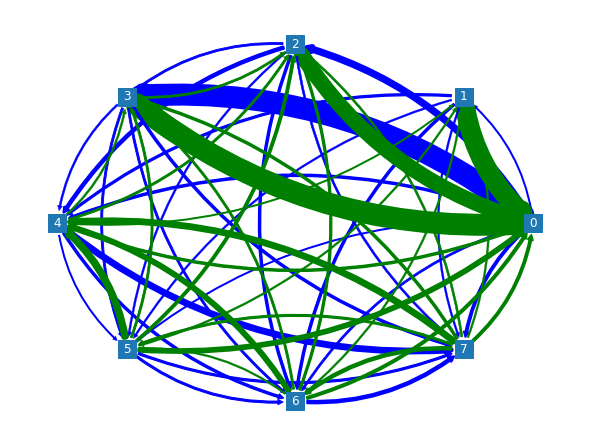

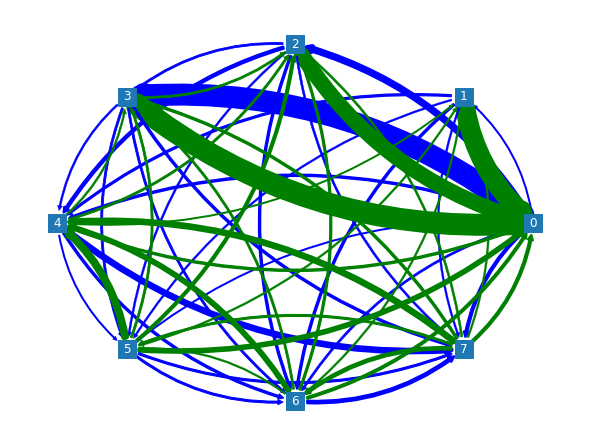

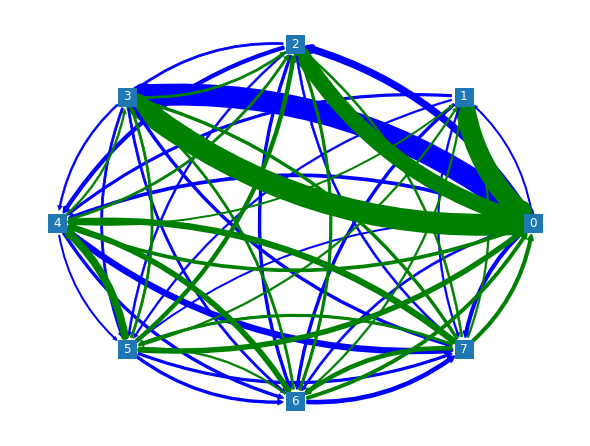

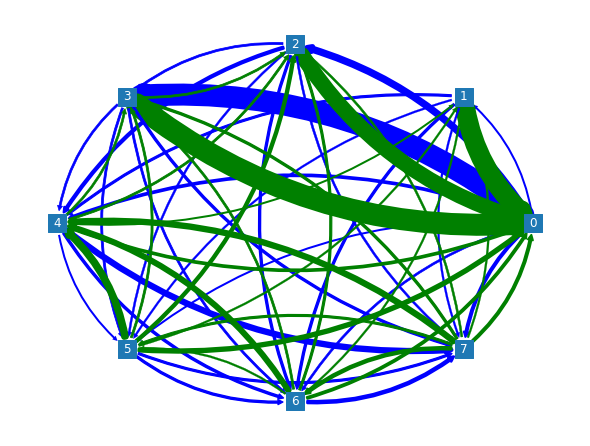

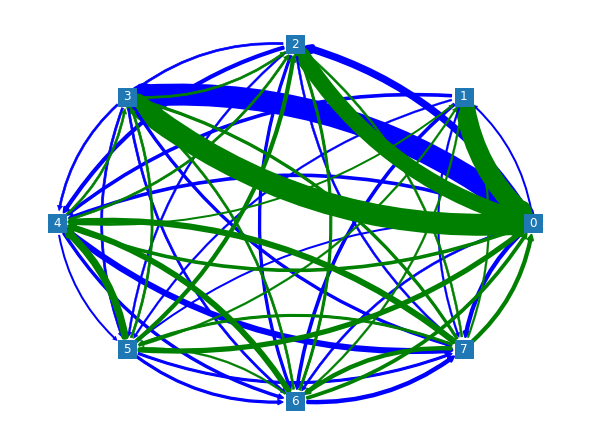

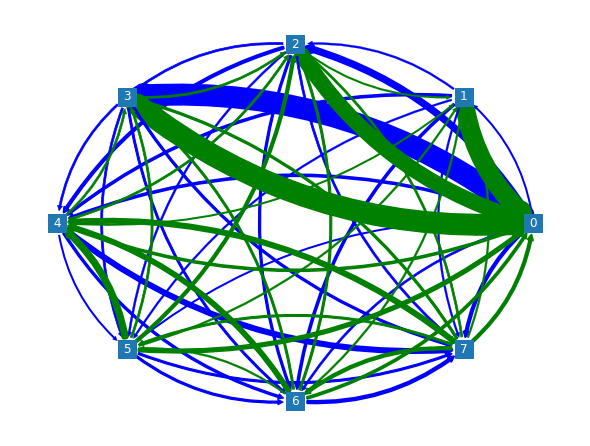

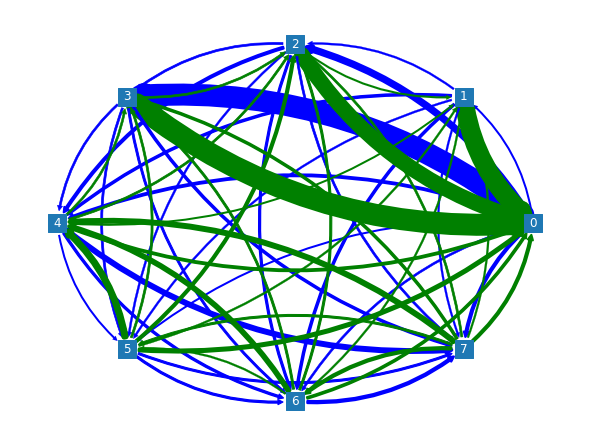

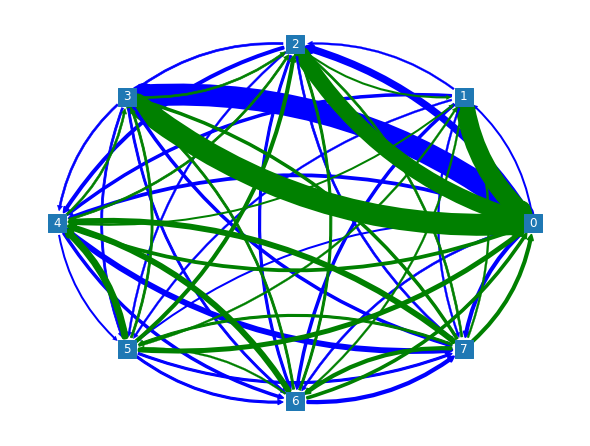

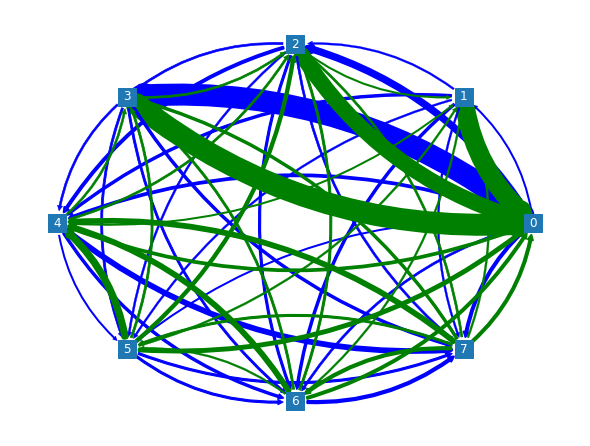

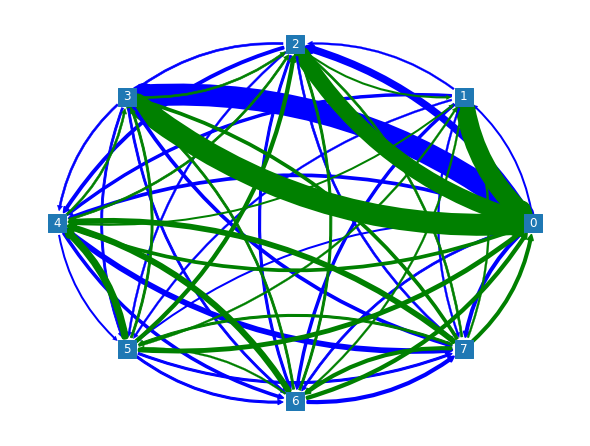

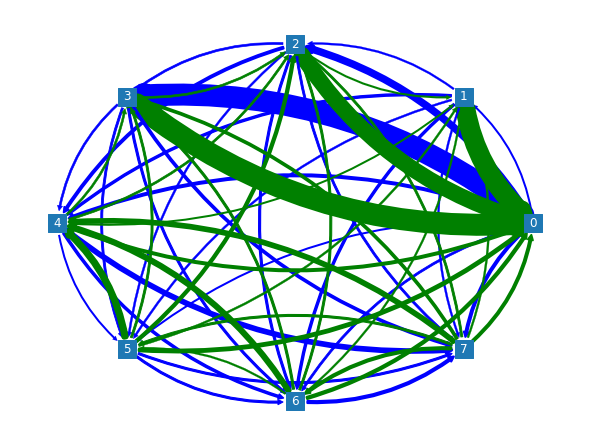

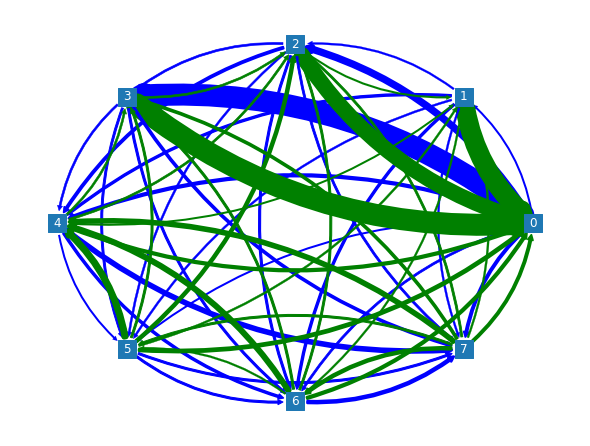

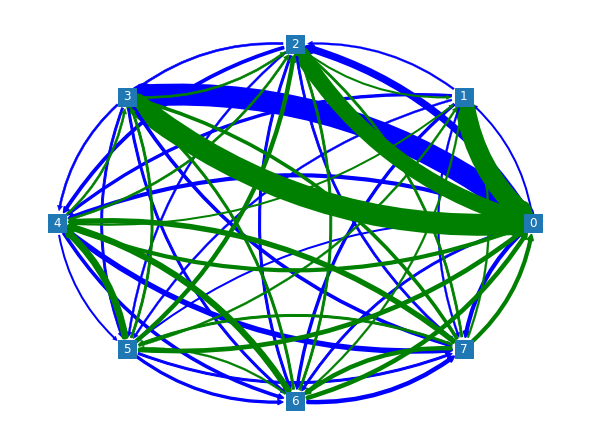

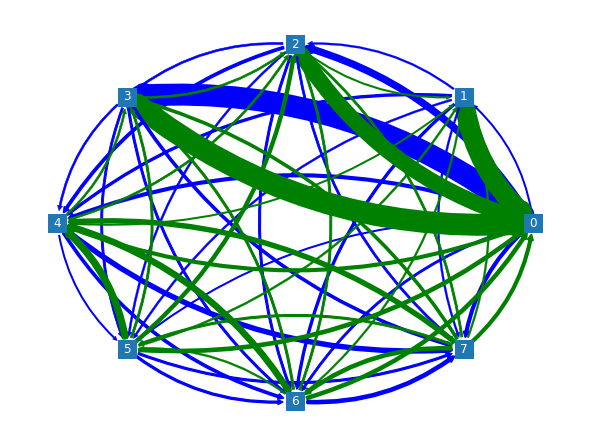

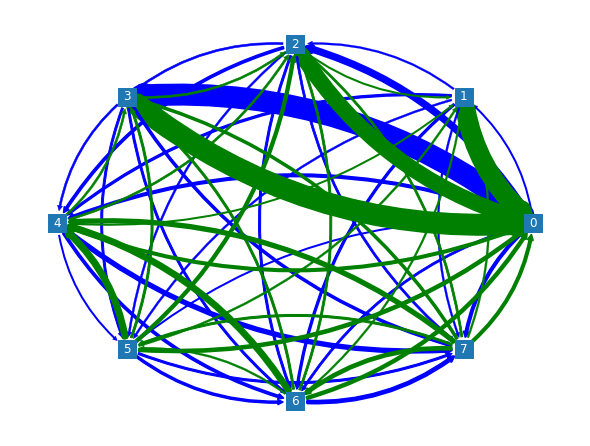

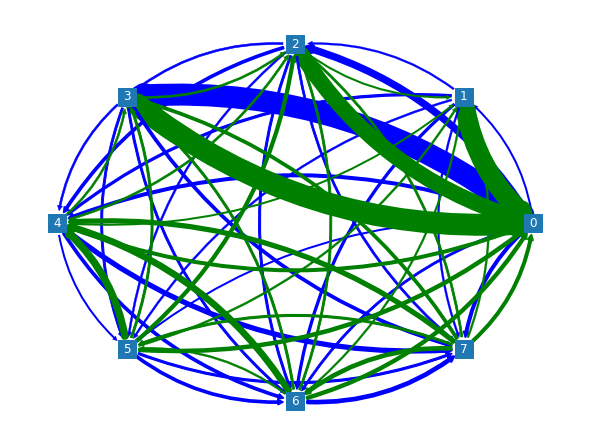

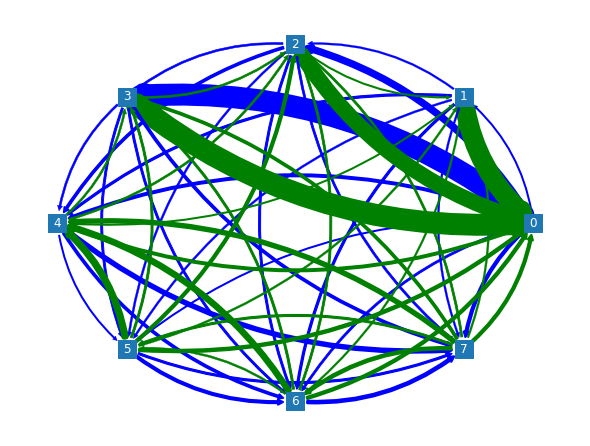

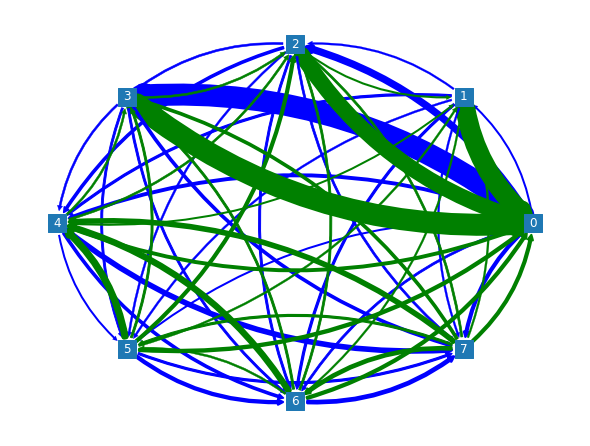

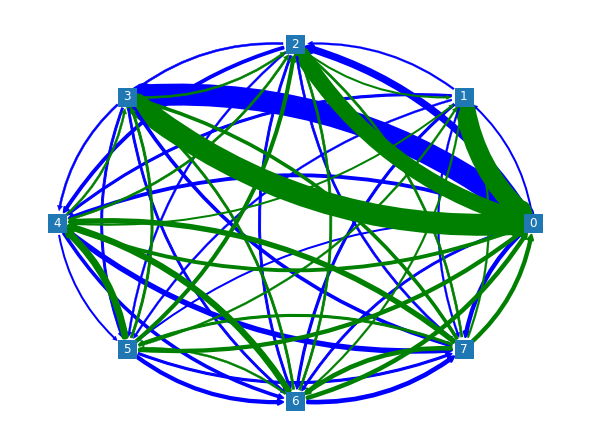

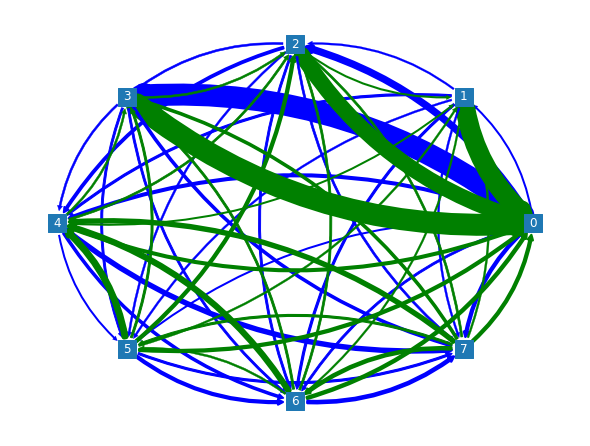

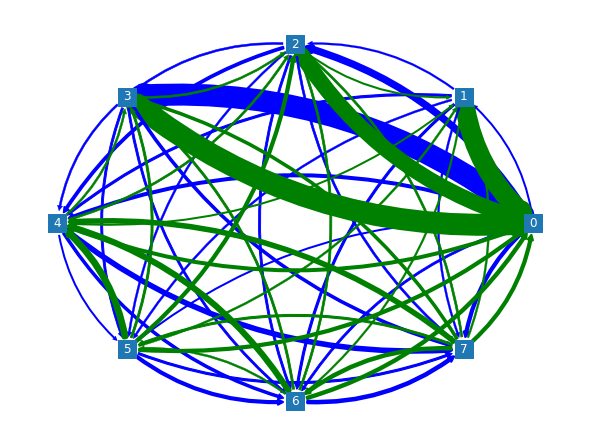

In [3]:

sim = Simulation(
    [
        Agent(EGreedySelectionStrategy(), AllC()),                      # 0
        Agent(EGreedySelectionStrategy(), AllD()),                      # 1
        Agent(EGreedySelectionStrategy(), RandomGameplayStrategy()),    # 2
        Agent(EGreedySelectionStrategy(), TitForTat()),                 # 3
        Agent(RandomSelectionStrategy(), AllC()),                       # 4
        Agent(RandomSelectionStrategy(), AllD()),                       # 5
        Agent(RandomSelectionStrategy(), RandomGameplayStrategy()),     # 6
        Agent(RandomSelectionStrategy(), TitForTat()),                  # 7
    ]
)

for i in range(50):
    sim.play_round()

    if i % 1 == 0:
        G = make_graph(sim.returns)
        plot_returns(G)

